## Exercises

This Notebook aims to analyse data generated by political candidates during the Irish General Elections 2016.
We have a CSV file describing candidates and a json file describing Twitter activity of candidates.
The aim is to merge the 2 files into a single CSV file and produce a data quality report and a data quality plan for the merged CSV, as well as some initial interpretation of findings.  The CSV file named  **ge16-results-elected.csv**, contains data describing the candidates, e.g., name, party and constituency, and data on whether they got elected or not. The json file contains data such as the candidate name and the number of tweets issued by their Twitter account, the number of followers the Twitter account has, etc. We aim to understand this data and to look for initial evidence that candidate Twitter account details (e.g., tweets, folowers) is (or not) indicative of getting elected.
The Notebook also contains an example solution for the practice exercises.

1. Getting Data: Download the data from Moodle. This is an archive named *Lab4-data-archive* 
    containing a file named **ge16-results-elected.csv** and a json file named: **ge16-twittercounter-candidates.json**

    - Merge the 2 files (your CSV file and the json file) into a single CSV file named 
    **ge16-candidates-twitter-elected.csv**

    - Only keep unique columns from each file (e.g., only one column named Party in the merged CSV file). 
    Show the first 10 rows in your resulting CSV file.

2. Data Understanding: Prepare a data quality report for your merged CSV file. 
    - Prepare a table with descriptive statistics for all the continuous features.
    - Prepare a table with descriptive statistics for all the categorical features.
    - Plot histograms for all the continuous features.
    - Plot box plots for all the continuous features.
    - Plot bar plots for all the categorical features.
    - Save all the tables and plots into files with self-explanatory names.    

3. Data Understanding: Prepare a data quality plan for the merged CSV file.
    - Mark down all the features where there are problems.
    - Propose solutions to deal with the problems identified.
    - Apply your solutions to obtain a new CSV file where data quality issues were addressed.
    Explain why did you choose one solution over (potentially many) other.
        
4. Data Understanding: Exploring relationships between feature pairs:
    - Choose a subset of 10 features and plot pairwise feature interaction 
    (e.g., continuous-continuous feature plot or continuous-categorical plots). Compute correlations for the numeric features.
    - Discuss your findings from the plots above. Do you find any features indicative of the candidate getting elected?



In [44]:
# Import pandas, numpy and matplotlib libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

# 1. Getting Data

In [45]:
# Convert csv and json files into dataframes
df1 = pd.read_csv('ge16-results-elected.csv')
df1.head(1)

,Twitter ID,Lastname,Firstname,Fullname,Gender,Party,Constituency,Elected,OnTwitter
0,507910843.0,Haughey,Sean,Sean Haughey,Male,ff,Dublin Bay North,1,1


In [46]:
df2 = pd.read_json('ge16-twittercounter-candidates.json')
df2.head(1)

,constituency,day_follower_change,firstname,followers,following,fullname,id,last_tweet,lastname,overall_follower_change,party,screen_name,tweets
0,Kildare South,0,Fiona,1721,1727,Fiona McLoughlin Healy,274437336,1 day ago,McLoughlin Healy,51,Fine Gael,fionamacky,6359


In [47]:
# Rename columns in df2 to match title of corresponding columns in df1 
df2 = df2.rename(columns = {'id':'Twitter ID'})
df2.head(1)

,constituency,day_follower_change,firstname,followers,following,fullname,Twitter ID,last_tweet,lastname,overall_follower_change,party,screen_name,tweets
0,Kildare South,0,Fiona,1721,1727,Fiona McLoughlin Healy,274437336,1 day ago,McLoughlin Healy,51,Fine Gael,fionamacky,6359


In [48]:
# Left merge on 'Twitter ID' - keeps all data from df1 and merge with corresponding data in df2
merged_df = pd.merge(df1, df2, how='left', on=['Twitter ID'])
merged_df.head(1)

,Twitter ID,Lastname,Firstname,Fullname,Gender,Party,Constituency,Elected,OnTwitter,constituency,...,firstname,followers,following,fullname,last_tweet,lastname,overall_follower_change,party,screen_name,tweets
0,507910843.0,Haughey,Sean,Sean Haughey,Male,ff,Dublin Bay North,1,1,Dublin Bay North,...,Sean,1589.0,437.0,Sean Haughey,1 day ago,Haughey,206.0,Fianna Fail,sean_haughey,2160.0


In [49]:
# There are 2 columns for party, first name, last name, full name and constituency data in the merged dataframe. 
# Keep the column that appear in the CSV file so that there are no null values (if a candidate is not on Twitter,
# it cannot be matched to any row in the json file and would therefore not be given a value for those columns)

merged_df = merged_df.drop('party', 1)
merged_df = merged_df.drop('firstname', 1)
merged_df = merged_df.drop('lastname', 1)
merged_df = merged_df.drop('fullname', 1)
merged_df = merged_df.drop('constituency', 1)
merged_df.head(1)

,Twitter ID,Lastname,Firstname,Fullname,Gender,Party,Constituency,Elected,OnTwitter,day_follower_change,followers,following,last_tweet,overall_follower_change,screen_name,tweets
0,507910843.0,Haughey,Sean,Sean Haughey,Male,ff,Dublin Bay North,1,1,11.0,1589.0,437.0,1 day ago,206.0,sean_haughey,2160.0


In [50]:
# Write the merged dataframe to a csv file
merged_df.to_csv('ge16-candidates-twitter-elected.csv', index=False)

In [51]:
# Show the first 10 rows in the resulting CSV file
df = pd.read_csv('ge16-candidates-twitter-elected.csv')
df.head(100)

,Twitter ID,Lastname,Firstname,Fullname,Gender,Party,Constituency,Elected,OnTwitter,day_follower_change,followers,following,last_tweet,overall_follower_change,screen_name,tweets
0,5.079108e+08,Haughey,Sean,Sean Haughey,Male,ff,Dublin Bay North,1,1,11.0,1589.0,437.0,1 day ago,206.0,sean_haughey,2160.0
1,2.386130e+08,O'Leary,Julie,Julie O'Leary,Female,fg,Cork North Central,0,1,-2.0,799.0,888.0,1 day ago,132.0,julieolry,3246.0
2,2.058638e+07,Cannon,Ciaran,Ciaran Cannon,Male,fg,Galway East,1,1,0.0,6061.0,2609.0,1 day ago,104.0,ciarancannon,13132.0
3,2.194540e+08,O'Brien,Johnathan,Jonathan O'Brien,Male,sf,Cork North Central,1,1,12.0,3943.0,1000.0,2 days ago,434.0,jobrien_sf,3305.0
4,1.973533e+07,Donohoe,Paschal,Paschal Donohoe,Male,fg,Dublin Central,1,1,5.0,10484.0,1817.0,1 day ago,310.0,paschald,7567.0
5,0.000000e+00,Quigley,Adam,Kiaran Adam Quigley,Male,ind,Dublin South West,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.000000e+00,Leahy,John,John Leahy,Male,renua,Offaly,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2.077740e+07,Doherty,Gary,Gary Doherty,Male,sf,Donegal,0,1,0.0,690.0,601.0,3 days ago,103.0,garydoc,1412.0
8,2.010677e+08,Hayde,Lorraine,Lorraine Hayde,Female,ind,Kildare South,0,1,0.0,113.0,228.0,1 month ago,8.0,lorhayde,514.0
9,2.911022e+07,McAuliffe,Paul,Paul McAuliffe,Male,ff,Dublin North West,0,1,0.0,1684.0,1638.0,2 days ago,94.0,paulmcauliffe,3829.0


# 2. Data Understanding: data quality report

## 2.1 Table with descriptive statistics for all the categorical features

In [52]:
# Select columns containing categorical data
categorical_columns = df[['Gender','Constituency','Elected','OnTwitter','last_tweet','Party']].columns

# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')

In [53]:
# Save table with descriptive statistics for all the categorical features in CSV file
df.select_dtypes(['category']).describe().T.to_csv('categorical_descriptive_stats.csv')

# Print table
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
Gender,100,2,Male,63
Party,100,10,fg,23
Constituency,100,37,Dun Laoghaire,6
Elected,100,2,0,60
OnTwitter,100,2,1,80
last_tweet,80,14,1 day ago,25


## 2.2 Table with descriptive statistics for all the continuous features

In [54]:
# Select columns containing continuous data
continuous_columns = df[['day_follower_change','followers','following','overall_follower_change','tweets']].columns

# Save table with descriptive statistics for all the continuous features in CSV file
df[continuous_columns].describe().T.to_csv('continuous_descriptive_stats.csv')

# Print table
df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
day_follower_change,80.0,3.2375,5.426713,-2.0,0.00,1.0,4.00,27.0
followers,80.0,3992.4125,6796.830115,11.0,522.75,1636.5,4040.75,44534.0
following,80.0,954.9125,823.910638,0.0,283.00,728.0,1619.25,3437.0
overall_follower_change,80.0,235.9375,432.727890,0.0,53.25,122.5,206.25,2189.0
tweets,80.0,2971.4375,4131.832011,1.0,483.50,1886.5,3478.75,27592.0


## 2.3 Histograms for all continuous features

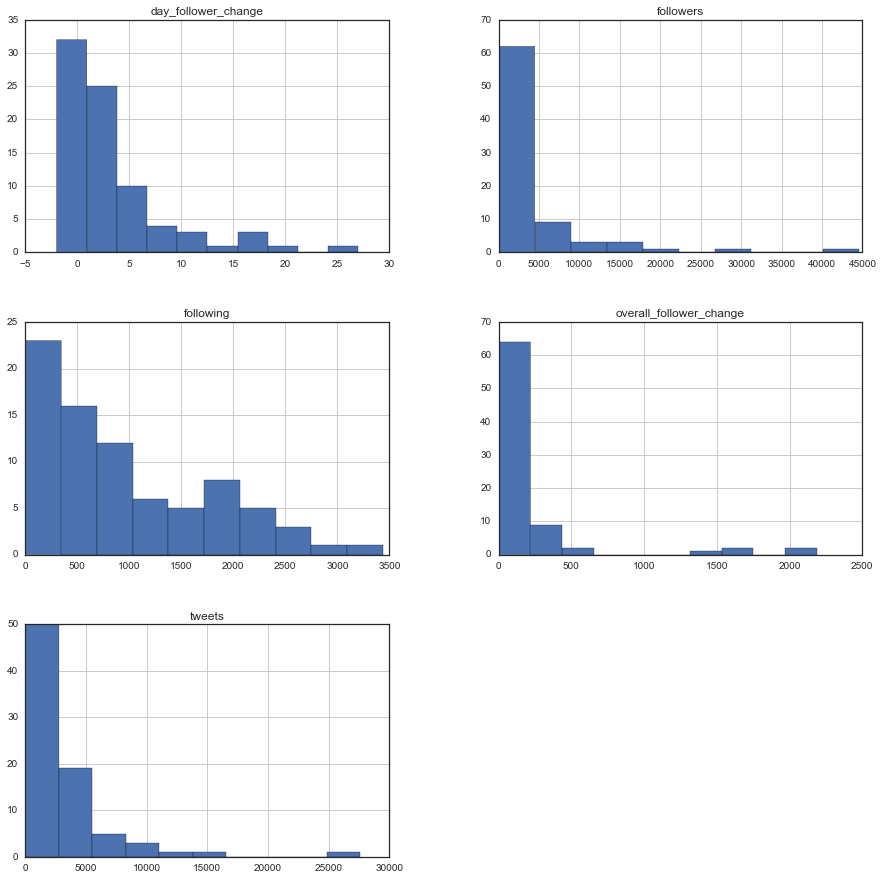

In [55]:
# Plot a histogram of the continuous features and save in a PDF file
df[continuous_columns].hist(figsize=(15,15))
plt.savefig('continuous_histograms.pdf')

## 2.4 Box plots for all the continuous features

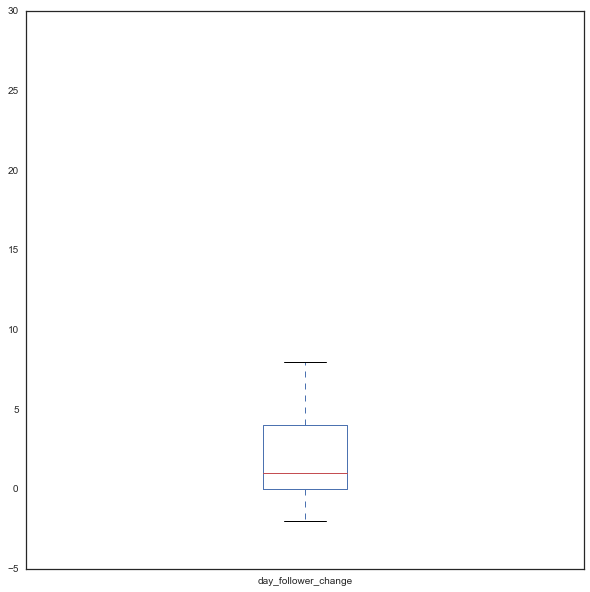

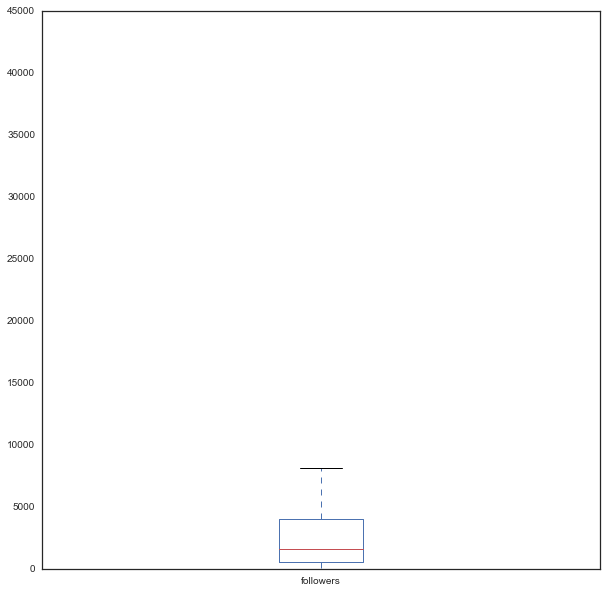

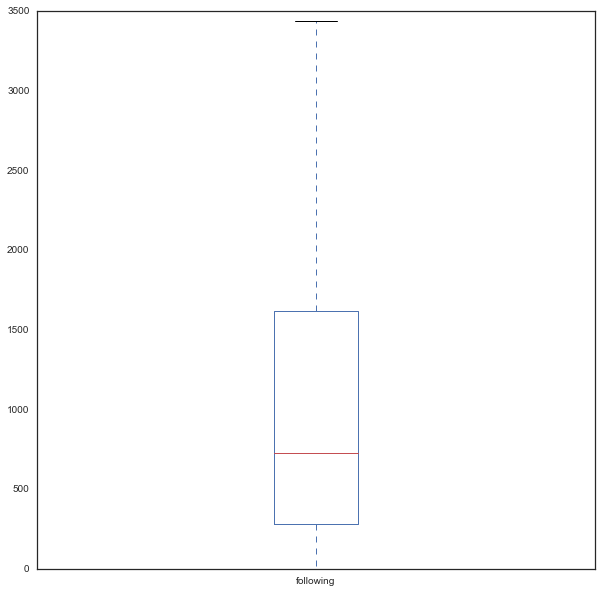

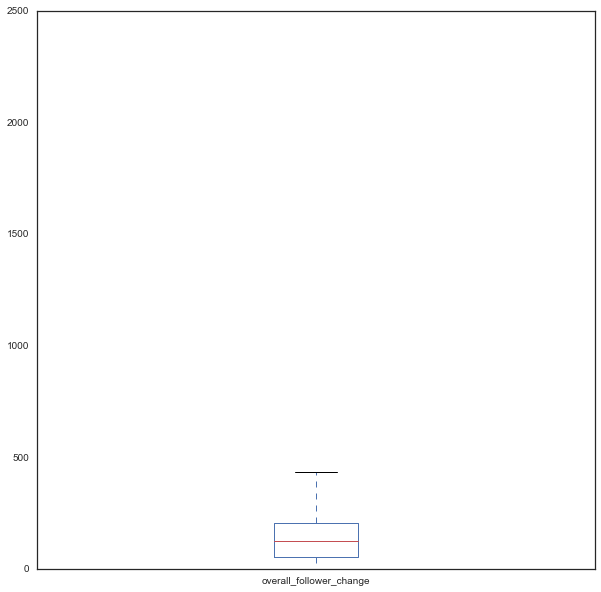

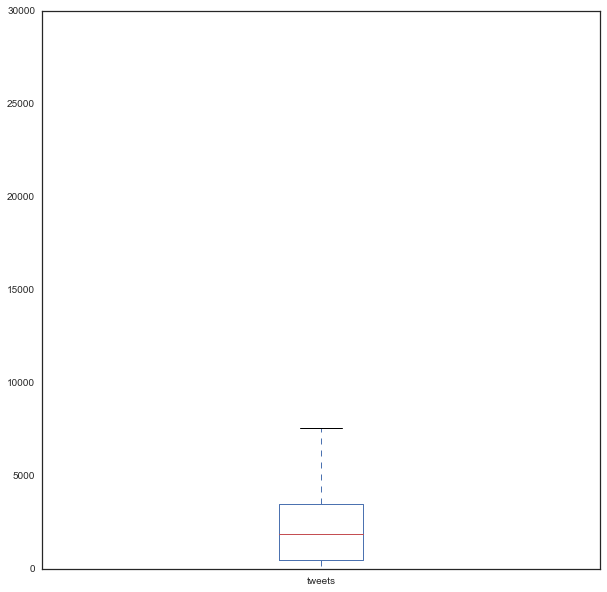

In [56]:
# Plot box plots for all the continuous features and save in a PDF file
pp = PdfPages('continuous_box_plots.pdf')

for col in continuous_columns:
    f = df[col].plot(SyntaxError: positional argument follows keyword argument
='box', figsize=(10,10))
    pp.savefig(f.get_figure())
    plt.show()

pp.close()

## 2.5 Bar plots for all the categorical features

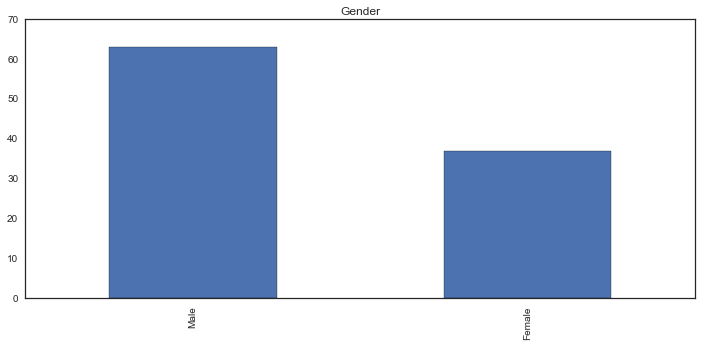

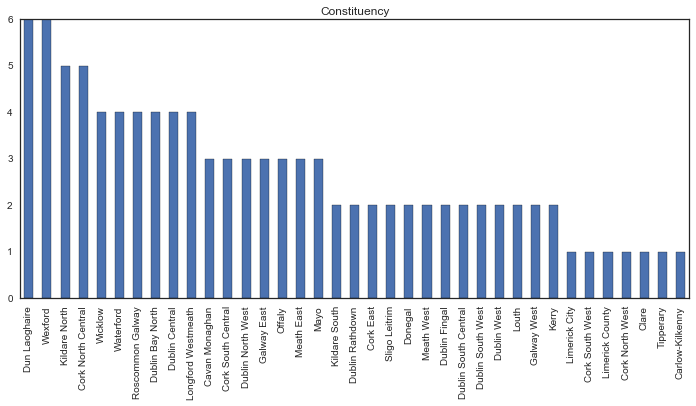

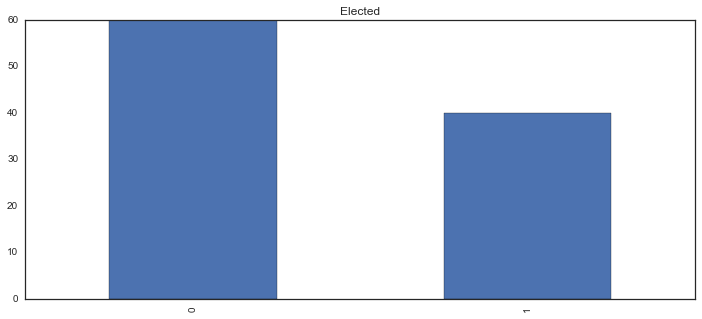

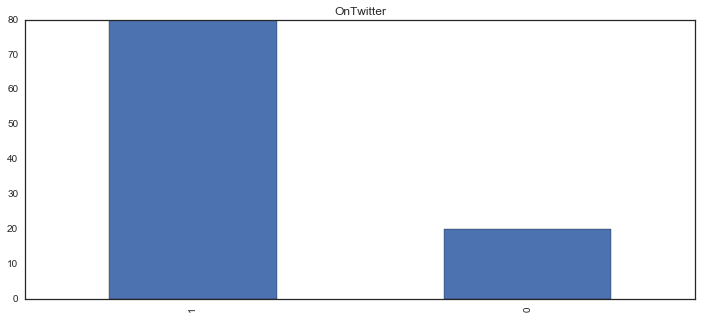

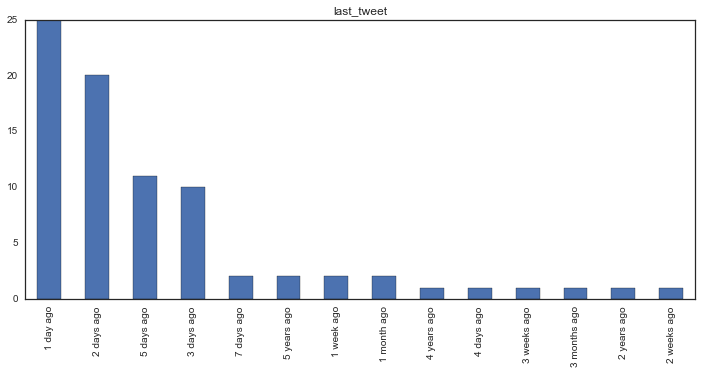

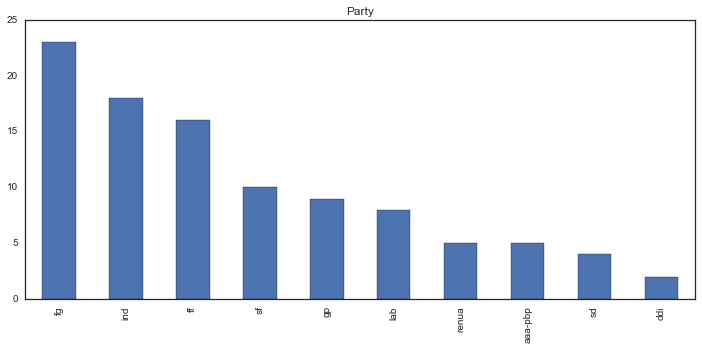

In [57]:
# Plot bar charts for all categorical features and save them in a single PDF file
pp = PdfPages('categorical_bar_charts.pdf')

for column in categorical_columns:
    f = df[column].value_counts().plot(kind='bar', title=column, figsize=(12,5))
    pp.savefig(f.get_figure())
    plt.show()

pp.close()

# 3. Data Understanding: data quality plan

## 3.1 Irregular cardinality

Categorical features can have irregular cardinality if the same value is entered several times with a different spelling for example. In the following cell, I check whether there are any values in the categorical features which are duplicated because 
of spelling mistakes or different input standards

In [58]:
# Check for irregular cardinality in categorical features. There could be same values spelled differently
print("Unique values for:\n- Gender:", pd.unique(df.Gender.ravel()))
print("\n- Constituency:", sorted(pd.unique(df.Constituency.ravel())))
print("\n- Elected:", sorted(pd.unique(df.Elected.ravel())))
print("\n- OnTwitter:", sorted(pd.unique(df.OnTwitter.ravel())))
print("\n- Party:", sorted(pd.unique(df.Party.ravel())))
print("\n- last_tweet:", pd.unique(df.last_tweet.ravel()))

Unique values for:
- Gender: ['Male' 'Female']

- Constituency: ['Carlow-Kilkenny', 'Cavan Monaghan', 'Clare', 'Cork East', 'Cork North Central', 'Cork North West', 'Cork South Central', 'Cork South West', 'Donegal', 'Dublin Bay North', 'Dublin Central', 'Dublin Fingal', 'Dublin North West', 'Dublin Rathdown', 'Dublin South Central', 'Dublin South West', 'Dublin West', 'Dun Laoghaire', 'Galway East', 'Galway West', 'Kerry', 'Kildare North', 'Kildare South', 'Limerick City', 'Limerick County', 'Longford Westmeath', 'Louth', 'Mayo', 'Meath East', 'Meath West', 'Offaly', 'Roscommon Galway', 'Sligo Leitrim', 'Tipperary', 'Waterford', 'Wexford', 'Wicklow']

- Elected: [0, 1]

- OnTwitter: [0, 1]

- Party: ['aaa-pbp', 'ddi', 'ff', 'fg', 'gp', 'ind', 'lab', 'renua', 'sd', 'sf']

- last_tweet: ['1 day ago' '2 days ago' nan '3 days ago' '1 month ago' '5 days ago'
 '3 months ago' '2 years ago' '4 days ago' '3 weeks ago' '1 week ago'
 '7 days ago' '2 weeks ago' '4 years ago' '5 years ago']


There are no values in the categorical features that is duplicated. The cardinality of those features is correct.

## 3.2 Null values

In the following cell, I check for null values in the dataset.

In [59]:
# Check whether there are null values in the data where values would be expected
df.isnull().sum()

Twitter ID                  0
Lastname                    0
Firstname                   0
Fullname                    0
Gender                      0
Party                       0
Constituency                0
Elected                     0
OnTwitter                   0
day_follower_change        20
followers                  20
following                  20
last_tweet                 20
overall_follower_change    20
screen_name                20
tweets                     20
dtype: int64

There are null values in the dataset, they correspond to features regarding Twitter account information. 20 candidates do not have a Twitter account and therefore the values for these features are null for those candidates. There are no null values where a value would be expected.

## 3.3 Outliers
In the box plots produced above, there are a number of outliers for the followers, tweets, day_follower_change and overall_follower_change features.
They could be error in the data or represent correct information. So in the following cells, I check who are the 5 candidates with the most followers, the highest rate of follower change and who tweet the most.

In [60]:
# In the box plot above, we can see that there are a number of outliers in the 'followers' feature. This could be
# an error or it could be due to the fact that the outlier is a candidate who is more famous or influential than other candidates.

# Find out the 5 candidates with the highest number of followers
df.sort_values(by='followers', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,Twitter ID,Lastname,Firstname,Fullname,Gender,Party,Constituency,Elected,OnTwitter,day_follower_change,followers,following,last_tweet,overall_follower_change,screen_name,tweets
39,135514272.0,Kenny,Enda,Enda Kenny,Male,fg,Mayo,1,1,20.0,44534.0,560.0,5 days ago,2189.0,endakennytd,431.0
88,148872468.0,McDonald,Mary Lou,Mary Lou McDonald,Female,sf,Dublin Central,1,1,18.0,26976.0,944.0,3 days ago,2146.0,maryloumcdonald,5227.0
33,118999126.0,Coveney,Simon,Simon Coveney,Male,fg,Cork South Central,1,1,7.0,21845.0,600.0,3 days ago,510.0,simoncoveney,3631.0
24,114007914.0,Martin,Micheal,Micheal Martin,Male,ff,Cork South Central,1,1,18.0,17439.0,1851.0,5 days ago,1690.0,michealmartintd,947.0
48,77184360.0,Burton,Joan,Joan Burton,Female,lab,Dublin West,1,1,11.0,15980.0,572.0,5 days ago,1325.0,joanburton,947.0


The candidate who has the most followers is Enda Kenny and the top five candidates are very influential. It is expected that they would have more followers than other candidates, therefore the outliers for this features seem to have correct values. 

In [61]:
# Find the 5 candidates with the highest rate of overall follower change
df.sort_values(by='overall_follower_change', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,Twitter ID,Lastname,Firstname,Fullname,Gender,Party,Constituency,Elected,OnTwitter,day_follower_change,followers,following,last_tweet,overall_follower_change,screen_name,tweets
39,135514272.0,Kenny,Enda,Enda Kenny,Male,fg,Mayo,1,1,20.0,44534.0,560.0,5 days ago,2189.0,endakennytd,431.0
88,148872468.0,McDonald,Mary Lou,Mary Lou McDonald,Female,sf,Dublin Central,1,1,18.0,26976.0,944.0,3 days ago,2146.0,maryloumcdonald,5227.0
82,236377912.0,Boyd-Barrett,Richard,Richard Boyd Barrett,Male,aaa-pbp,Dun Laoghaire,1,1,18.0,14290.0,1822.0,1 day ago,1742.0,rboydbarrett,3097.0
24,114007914.0,Martin,Micheal,Micheal Martin,Male,ff,Cork South Central,1,1,18.0,17439.0,1851.0,5 days ago,1690.0,michealmartintd,947.0
48,77184360.0,Burton,Joan,Joan Burton,Female,lab,Dublin West,1,1,11.0,15980.0,572.0,5 days ago,1325.0,joanburton,947.0


In [62]:
# Find the 5 candidates with the highest rate of day follower change
df.sort_values(by='day_follower_change', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,Twitter ID,Lastname,Firstname,Fullname,Gender,Party,Constituency,Elected,OnTwitter,day_follower_change,followers,following,last_tweet,overall_follower_change,screen_name,tweets
17,190987689.0,Murphy,Catherine,Catherine Murphy,Female,sd,Kildare North,1,1,27.0,13245.0,1421.0,2 days ago,0.0,cathmurphytd,6485.0
39,135514272.0,Kenny,Enda,Enda Kenny,Male,fg,Mayo,1,1,20.0,44534.0,560.0,5 days ago,2189.0,endakennytd,431.0
82,236377912.0,Boyd-Barrett,Richard,Richard Boyd Barrett,Male,aaa-pbp,Dun Laoghaire,1,1,18.0,14290.0,1822.0,1 day ago,1742.0,rboydbarrett,3097.0
24,114007914.0,Martin,Micheal,Micheal Martin,Male,ff,Cork South Central,1,1,18.0,17439.0,1851.0,5 days ago,1690.0,michealmartintd,947.0
88,148872468.0,McDonald,Mary Lou,Mary Lou McDonald,Female,sf,Dublin Central,1,1,18.0,26976.0,944.0,3 days ago,2146.0,maryloumcdonald,5227.0


The candidates who have the highest rate of overall follower change have a high number of followers (4 of them are in the top 5). They also correspond to candidates with a high daily follower change rate. The data therefore does not seem erroneous.

In [63]:
# Find the 5 candidates with the most tweets
df.sort_values(by='tweets', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,Twitter ID,Lastname,Firstname,Fullname,Gender,Party,Constituency,Elected,OnTwitter,day_follower_change,followers,following,last_tweet,overall_follower_change,screen_name,tweets
55,180885830.0,Hunt,Carol,Carol Hunt,Female,ind,Dun Laoghaire,0,1,1.0,8113.0,2680.0,1 day ago,299.0,carolmhunt,27592.0
15,18492194.0,Lawless,James,James Lawless,Male,ff,Kildare North,1,1,3.0,2478.0,2208.0,1 day ago,129.0,lawlessj,16452.0
2,20586381.0,Cannon,Ciaran,Ciaran Cannon,Male,fg,Galway East,1,1,0.0,6061.0,2609.0,1 day ago,104.0,ciarancannon,13132.0
66,92521829.0,Mitchell-OConnor,Mary,Mary Mitchell O'Connor,Female,fg,Dun Laoghaire,1,1,4.0,5707.0,2752.0,1 day ago,157.0,mitchelloconnor,8989.0
78,39019643.0,Higgins,Lorraine,Lorraine Higgins,Female,lab,Galway East,0,1,4.0,4497.0,1332.0,2 days ago,171.0,lorhiggins,8919.0


The 5 candidates with the most tweets tweeted in the last couple of days. It is possible that they have a habit of twitting often. It is not possible to understand whether the data is correct or not.

## 3.4 Duplicate rows

In the following cell, I check for duplicate rows. It is important to eliminate duplicates so as not to skew the result of the analysis, so if one candidate appears in more than one row, it would be necessary to eliminate one of the rows.

In [64]:
# Checking for duplicated rows
print(df.set_index('Twitter ID').index.get_duplicates())
print(df.set_index('Fullname').index.get_duplicates())
print(df.set_index('screen_name').index.get_duplicates())

[0.0]
[]
[nan]


There are no rows containing the same values for twitter ID, Fullname or screen_name, except for null values in Twitter ID and screen_name, suggesting that there are no duplicated candidates.

## 3.5 Solutions

#### Data Quality Plan

| Feature                 | Data Quality Issue   | Handling Strategy            |
|-------------------------|----------------------|------------------------------|
| day_follower_change     | Missing Values (20%) | Complete-case analysis       |
| followers               | Missing Values (20%) | Complete-case analysis       | 
| following               | Missing Values (20%) | Complete-case analysis       |
| last_tweet              | Missing Values (20%) | Complete-case analysis       |
| overall_follower_change | Missing Values (20%) | Complete-case analysis       |
| screen_name             | Missing Values (20%) | Complete-case analysis       |
| tweets                  | Missing Values (20%) | Complete-case analysis       |
| followers               | Outliers             | Do nothing                   |
| day_follower_change     | Outliers             | Do nothing                   |
| overall_follower_change | Outliers             | Do nothing                   |
| tweets                  | Outliers             | Do nothing                   |

I am removing all rows containing null values, because they correspond to candidates who do not have a Twitter account. The tasl for this problem is to 'look for initial evidence that candidate Twitter account details (e.g., tweets, folowers) is (or not) indicative of getting elected'. Therefore data relating to candidates who do not have a Twitter account is not relevant and would skew the result of the analysis. Dropping the features containing null values would affect the analysis because they correspond to the Twitter account details of the candidates. Imputation (replacing missing values with a measure of central tendency) would not be useful either because it would distort the data by putting too much weight on the mean, median or mode depending on which measure was chosen as a replacement.

There are outliers in the followers, day_follower_change, overall_follower_change and tweets features. I have decided not to remove the outliers by clamping, because as shown above, the outliers for  followers, day_follower_change and overall_follower_change seem to be valid. Removing this data would probably modify the dataset to not reflect reality. It is not possible to verify the validity of the outliers in the tweets feature so I chose to be cautious and to accept them as being valid, and therefore to keep them in the dataset so as not to produce distorted data. 


In [65]:
# Remove all rows for candidates who are not on Twitter - therefore all rows with null values
clean_df = df[df.OnTwitter == 1]
clean_df.head()

,Twitter ID,Lastname,Firstname,Fullname,Gender,Party,Constituency,Elected,OnTwitter,day_follower_change,followers,following,last_tweet,overall_follower_change,screen_name,tweets
0,507910843.0,Haughey,Sean,Sean Haughey,Male,ff,Dublin Bay North,1,1,11.0,1589.0,437.0,1 day ago,206.0,sean_haughey,2160.0
1,238613047.0,O'Leary,Julie,Julie O'Leary,Female,fg,Cork North Central,0,1,-2.0,799.0,888.0,1 day ago,132.0,julieolry,3246.0
2,20586381.0,Cannon,Ciaran,Ciaran Cannon,Male,fg,Galway East,1,1,0.0,6061.0,2609.0,1 day ago,104.0,ciarancannon,13132.0
3,219454029.0,O'Brien,Johnathan,Jonathan O'Brien,Male,sf,Cork North Central,1,1,12.0,3943.0,1000.0,2 days ago,434.0,jobrien_sf,3305.0
4,19735329.0,Donohoe,Paschal,Paschal Donohoe,Male,fg,Dublin Central,1,1,5.0,10484.0,1817.0,1 day ago,310.0,paschald,7567.0


In [66]:
# Check that there are no null values in the dataframe
print(clean_df.isnull().sum())

# check that only 20 rows have been removed (check that there are now 80 rows)
print("\nNumber of rows:", clean_df.shape[0])

Twitter ID                 0
Lastname                   0
Firstname                  0
Fullname                   0
Gender                     0
Party                      0
Constituency               0
Elected                    0
OnTwitter                  0
day_follower_change        0
followers                  0
following                  0
last_tweet                 0
overall_follower_change    0
screen_name                0
tweets                     0
dtype: int64

Number of rows: 80


Now that rows for candidates who are not on Twitter have been removed, the feature OnTwitter should have a cardinality of 1. If this is the case, it can be removed as it is not useful.

In [67]:
# print unique values in OnTwitter column
print("\n- Unique values for OnTwitter:", pd.unique(clean_df.OnTwitter.ravel()))

# Remove OnTwitter column if there are only one unique value in OnTwitter
if(len(pd.unique(clean_df.OnTwitter.ravel())) == 1):
    clean_df = clean_df.drop('OnTwitter', 1)

# Save cleaned dataframe to new CSV file
clean_df.to_csv('ge16-candidates-twitter-elected-clean.csv', index=False)

clean_df.head(1)


- Unique values for OnTwitter: [1]


,Twitter ID,Lastname,Firstname,Fullname,Gender,Party,Constituency,Elected,day_follower_change,followers,following,last_tweet,overall_follower_change,screen_name,tweets
0,507910843.0,Haughey,Sean,Sean Haughey,Male,ff,Dublin Bay North,1,11.0,1589.0,437.0,1 day ago,206.0,sean_haughey,2160.0


#### Summary of data quality plan:
   
| Feature                 | Data Quality Issue   | Handling Strategy            |
|-------------------------|----------------------|------------------------------|
| day_follower_change     | Missing Values (20%) | Complete-case analysis       |
| followers               | Missing Values (20%) | Complete-case analysis       | 
| following               | Missing Values (20%) | Complete-case analysis       |
| last_tweet              | Missing Values (20%) | Complete-case analysis       |
| overall_follower_change | Missing Values (20%) | Complete-case analysis       |
| screen_name             | Missing Values (20%) | Complete-case analysis       |
| tweets                  | Missing Values (20%) | Complete-case analysis       |
| followers               | Outliers             | Do nothing                   |
| day_follower_change     | Outliers             | Do nothing                   |
| overall_follower_change | Outliers             | Do nothing                   |
| tweets                  | Outliers             | Do nothing                   |
| OnTwitter               | Cardinality (1)      | Remove column                |


# 4. Data Understanding: Relationships between feature pairs

The features that I will use to look at pairwise feature interaction are 5 continuous features:
- day_follower_change
- overall_follower_change
- followers
- following
- tweets

and 5 categorical features:
- elected
- gender
- party
- constituency
- last_tweet

## 4.1 Correlations for the numeric features

In this section, I create a correlation matrix for the 5 continuous features.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5]), <a list of 5 Text xticklabel objects>)

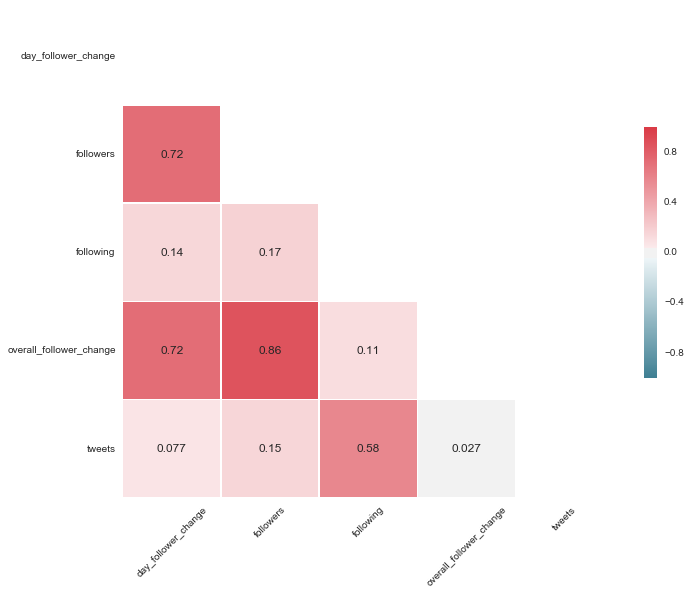

In [68]:
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
clean_df = pd.read_csv('ge16-candidates-twitter-elected-clean.csv')
sns.set(style="white")

# Select columns containing continuous data
continuous_columns = clean_df[['day_follower_change','followers','following','overall_follower_change','tweets']].columns

# Calculate correlation of all pairs of continuous features
corr = clean_df[continuous_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

## 4.2 Continuous-continuous feature plots

In the following cells, there are plots for pairs of continuous features which have been shown to have a high correlation on the matrix above.

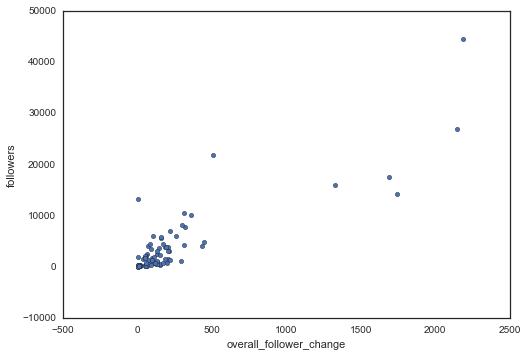

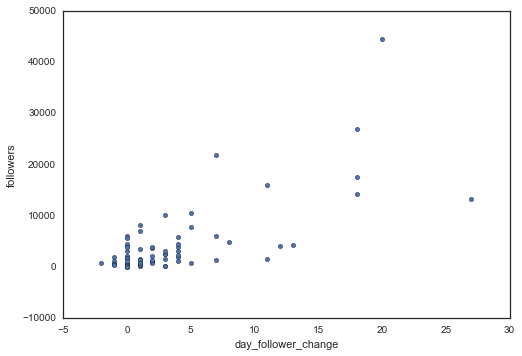

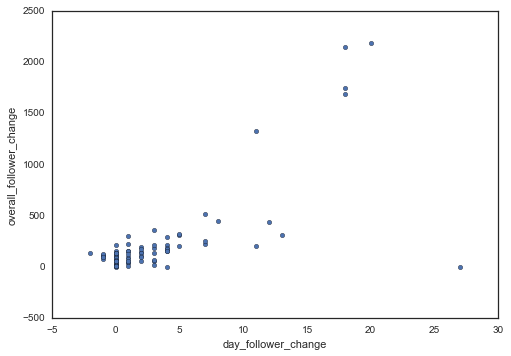

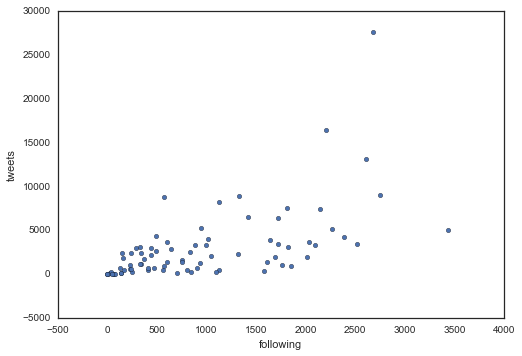

In [69]:
clean_df.plot(kind='scatter', x='overall_follower_change', y='followers')
clean_df.plot(kind='scatter', x='day_follower_change', y='followers')
clean_df.plot(kind='scatter', x='day_follower_change', y='overall_follower_change')
clean_df.plot(kind='scatter', x='following', y='tweets')

## 4.3 Categorical-categorical feature plots

In this section, I create stacked bar charts for pairs of categorical features. I create an extra column 'percent' in the dataframe in order to calculate the percentage of rows having particular values for a pair of features, for example the percentage of women and men elected and not elected.

### 4.3.1 Elected candidates by gender

(0, 100)

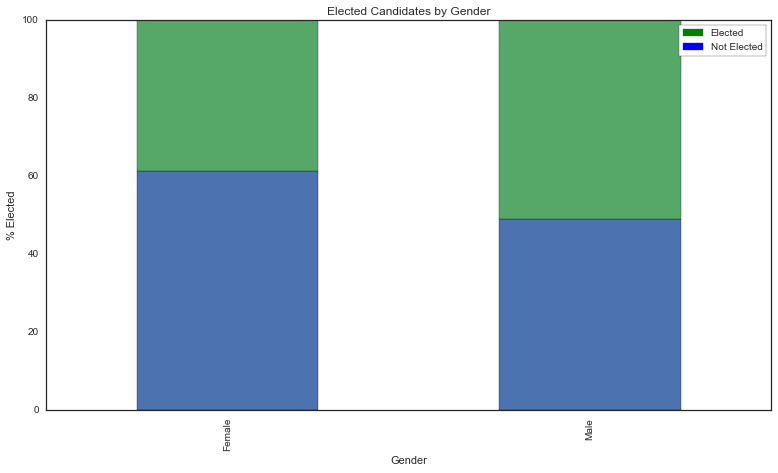

In [70]:
# Count the number of female candidates
female_count = 1 / clean_df[clean_df.Gender == 'Female'].count()['Gender']

# Counts the number of male candidates
male_count = 1 / clean_df[clean_df.Gender == 'Male'].count()['Gender']

# Create a new column in the dataframe called percent and insert male_count in all cells
clean_df['percent'] = male_count * 100

# Find indexes of all rows containing value Female for Gender
index_list = clean_df[clean_df['Gender'] == 'Female'].index.tolist()

# For each row with a 'female' value, insert female_count in the percent column
for i in index_list:
    clean_df.loc[i, 'percent'] = female_count * 100

# Group dataframe by Gender and Elected and sum precent
category_group = clean_df[['percent','Gender','Elected']].groupby(['Gender','Elected']).sum()

# Plot values of category_group in a stacked bar chart
my_plot = category_group.unstack().plot(kind='bar', stacked=True, title="Elected Candidates by Gender", figsize=(13,7))

# Define legend colours and text and add to the plot
red_patch = mpatches.Patch(color='green', label='Elected')
blue_patch = mpatches.Patch(color='blue', label='Not Elected')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("Gender")
my_plot.set_ylabel("% Elected")
my_plot.set_ylim([0,100])


### 4.3.2 Elected Candidates by Party 

(0, 100)

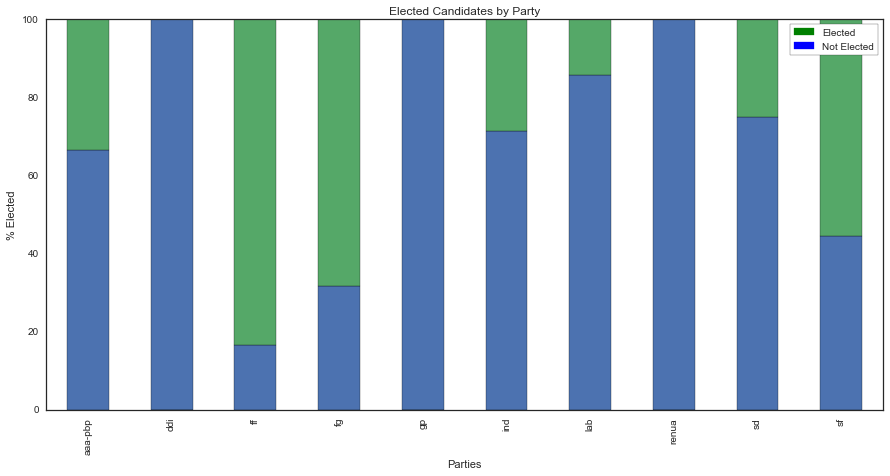

In [71]:
# Find unique values in Party
parties = pd.unique(clean_df.Party.ravel())

# Insert a new column called 'percent' and fill it with 0s
clean_df['percent'] = 0

# Iterate through the unique values in Party and for each value count the amount of elected candidates
# Find the indexes of each row with a particular party amd for each of these row insert count * 100 in the percent column
for p in parties:
    count = 1 / clean_df[clean_df.Party == p].count()['Elected']
    index_list = clean_df[clean_df['Party'] == p].index.tolist()
    for i in index_list:
        clean_df.loc[i, 'percent'] = count * 100
        
# Group dataframe by Party and Elected and sum percent
group = clean_df[['percent','Party','Elected']].groupby(['Party','Elected']).sum()

# Plot values of group in a stacked bar chart
my_plot = group.unstack().plot(kind='bar', stacked=True, title="Elected Candidates by Party", figsize=(15,7))

# Define label colours and text and add to the plot
red_patch = mpatches.Patch(color='green', label='Elected')
blue_patch = mpatches.Patch(color='blue', label='Not Elected')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("Parties")
my_plot.set_ylabel("% Elected")
my_plot.set_ylim([0,100])



### 4.3.3 Elected Candidates by Last Tweet

(0, 100)

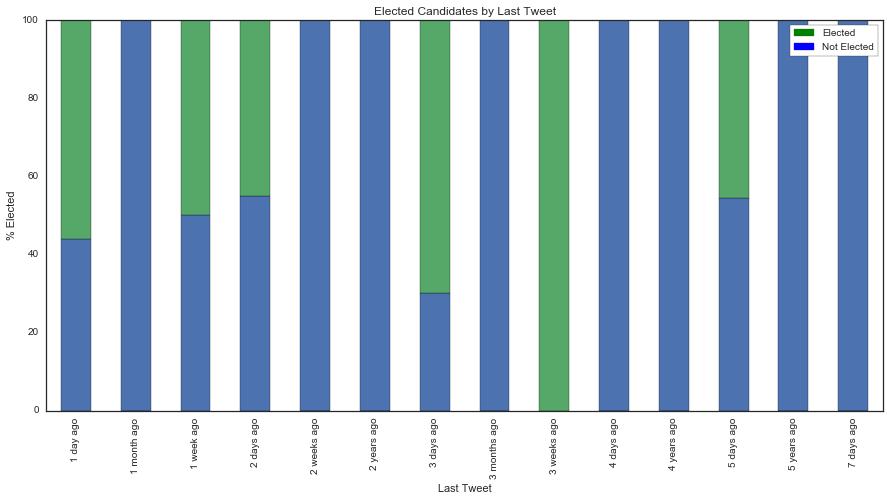

In [72]:
# List unique values in last_tweet
last_tweet = pd.unique(clean_df.last_tweet.ravel())

# Insert new column in df called 'percent' and fill with 0s
clean_df['percent'] = 0

# Iterate through the unique values in last_tweet and for each value count the amount of elected candidates
# Find the indexes of each row with a particular value for last_tweet and for each of these row insert count * 100
# in the percent column
for t in last_tweet:
    count = 1 / clean_df[clean_df.last_tweet == t].count()['Elected']
    index_list = clean_df[clean_df['last_tweet'] == t].index.tolist()
    for i in index_list:
        clean_df.loc[i, 'percent'] = count * 100
        
# Group dataframe by last_tweet and Elected and sum percent
group = clean_df[['percent','last_tweet','Elected']].groupby(['last_tweet','Elected']).sum()

# Plot values of category_group in a stacked bar chart
my_plot = group.unstack().plot(kind='bar', stacked=True, title="Elected Candidates by Last Tweet", figsize=(15,7), sort_columns=True)

# Define label colours and text and add to the plot
red_patch = mpatches.Patch(color='green', label='Elected')
blue_patch = mpatches.Patch(color='blue', label='Not Elected')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("Last Tweet")
my_plot.set_ylabel("% Elected")
my_plot.set_ylim([0,100])


### 4.3.4 Elected by Constituency

(0, 100)

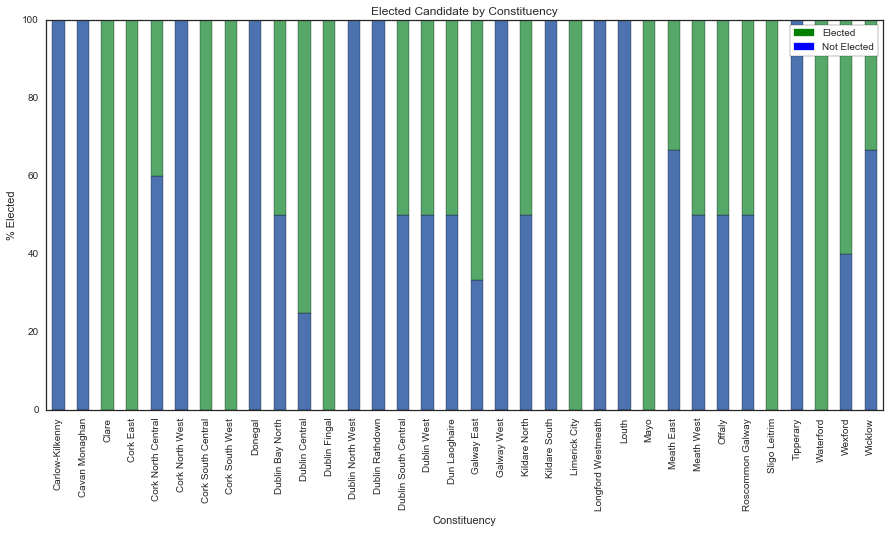

In [73]:
# List unique values in constituency
constituencies = pd.unique(clean_df.Constituency.ravel())

# Insert new column in df called 'percent' and fill with 0s
clean_df['percent'] = 0

# Iterate through the unique values in constituency and for each value count the amount of elected candidates
# Find the indexes of each row in a particular constituency and for each of these row insert count * 100 in the percent column
for c in constituencies:
    count = 1 / clean_df[clean_df.Constituency == c].count()['Elected']
    index_list = clean_df[clean_df['Constituency'] == c].index.tolist()
    for i in index_list:
        clean_df.loc[i, 'percent'] = count * 100
        
# Group dataframe by constituency and Elected and sum
group = clean_df[['percent','Constituency','Elected']].groupby(['Constituency','Elected']).sum()

# Plot values of group in a stacked bar chart
my_plot = group.unstack().plot(kind='bar', stacked=True, title="Elected Candidate by Constituency", figsize=(15,7))

# Define label colours and text and add to the plot
red_patch = mpatches.Patch(color='green', label='Elected')
blue_patch = mpatches.Patch(color='blue', label='Not Elected')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("Constituency")
my_plot.set_ylabel("% Elected")
my_plot.set_ylim([0,100])



## 4.3 Continuous-categorical feature plots

In this section, I plot all continuous features with the categorical feature 'Elected' in box plots.

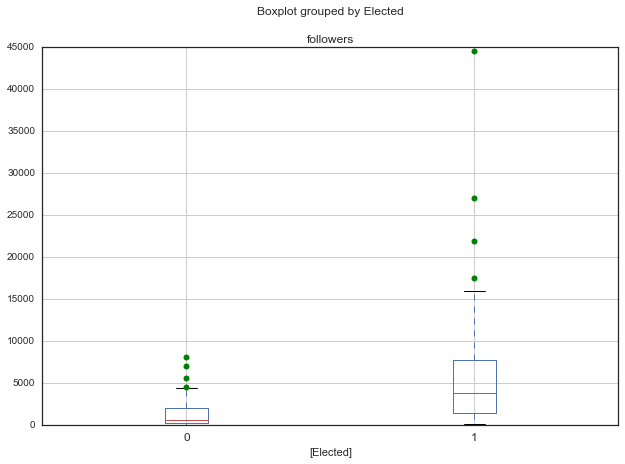

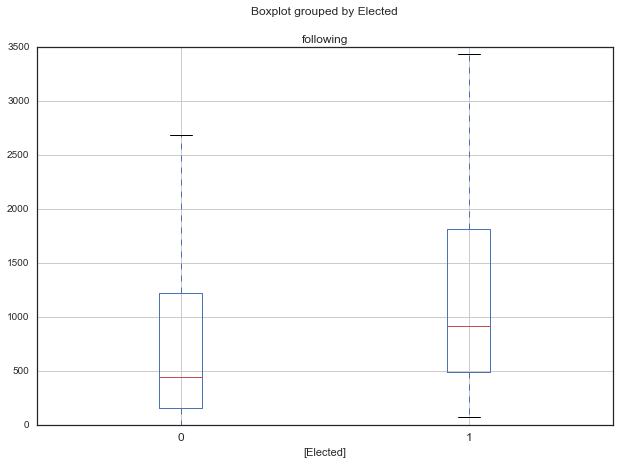

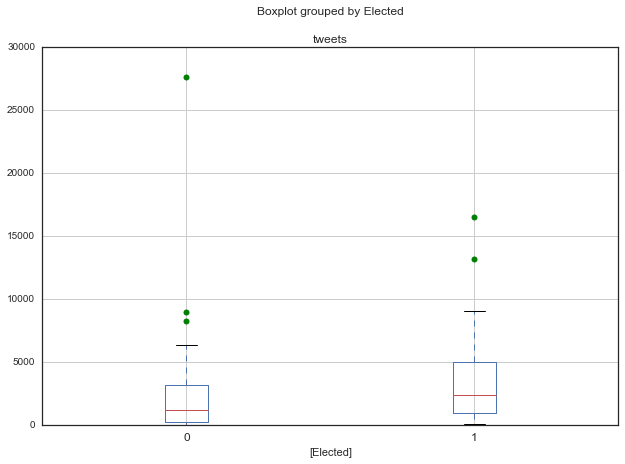

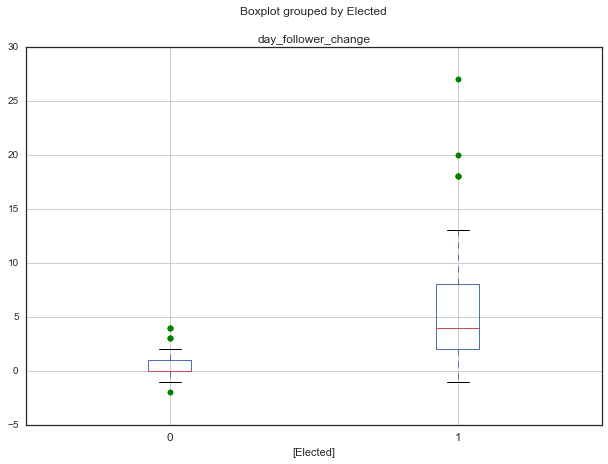

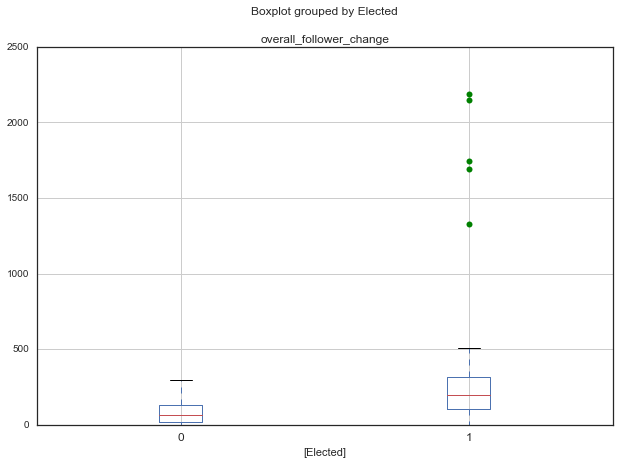

In [74]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
bp = clean_df.boxplot(column=['followers'], by=['Elected'], flierprops=flierprops, figsize=(10,7))
bp = clean_df.boxplot(column=['following'], by=['Elected'], flierprops=flierprops, figsize=(10,7))
bp = clean_df.boxplot(column=['tweets'], by=['Elected'], flierprops=flierprops, figsize=(10,7))
bp = clean_df.boxplot(column=['day_follower_change'], by=['Elected'], flierprops=flierprops, figsize=(10,7))
bp = clean_df.boxplot(column=['overall_follower_change'], by=['Elected'], flierprops=flierprops, figsize=(10,7))

## 4.4 Discussion

By looking at the plots above, we can see that there are a number of features that are indicative of a candidate being elected. By analysing this sample of candidates, it appears that men are slighlty more likely to be elected than women: 40% of female in the sample were elected agains 50% of males.

Candidates belonging to certain parties appear to be more likely to be elected. The stacked bar chart for elected candidates by party show that the parties with the highest percentage of elected candidates are Fianna Fáil (80%), Fine Gael (c. 65%) and Sinn Féin (c. 55%).

Candidates in certain constituencies appear to be more likely to be elected than in others, this could be because there are different number of seats in each constituency and a different number of candidates competing for those seats. However this could also be due to the sample being too small, and not fairly representing candidates for each constituency. In the sample, none of the candidates in Carlow-Kilkenny or Cavan-Monaghan were elected and all candidates in Clare and Cork East were elected for example. 

Looking at Twitter account details, we can find indications of candidates being elected.

Candidates who tweeted more recently appear more likely to be elected. The stacked bar chart for elected candidates by tweets shows that none of the candidates who last tweeted a month ago or longer were elected. Candidates who tweeted a week ago or less were more likely to be elected: only the bars representing a week ago or less contain elected candidates, with the exception of the '3 weeks ago' bar.

Candidates with a higher number of followers appear more likely to be elected. The box plots showing followers for elected and non-elected candidates show that the average number of followers for elected candidates is around 4000 and for non-elected candidates around 500.

Candidates following more people on Twitter also seem to be more likely to be elected. The box plots show that on average, elected candidates follow around 900 people and candidates who were not elected follow on average just over 400 people.

The number of tweets also seem to be indicative of a candidate being elected. On average, elected candidates tweeted around 2000 times versus circa 1200 times for candidates who were not elected.

Higher rates of change in followers per day and overall also seem to be associated with elected candidates. And average of respectively 4 and 200 changes for elected candidates versus 0 and less than 100 for candidates who were not elected. This is to be expected as we have seen that elected candidates have a greater amount of followers. The correlation matrix shows that there is a positive correlation of 0.86 between overall follower change and the number of followers and of 0.72 between day follower change and the number of followers.

The sample that was analysed above shows initial evidence that candidate Twitter account details are indicative of getting elected. Candidates who used their account more frequently and have interaction with more Twitter users (following more people and being followed by more people) seem to be more likely to be elected.

